# Notebook to visualize graph latent space

In [21]:
import sys,os,pandas
import numpy as np
sys.path.append(os.path.expanduser('../../src/ml'))
# sys.path.append(os.path.expanduser('..'))

from load_matrix import load_df, _load_filtered_entities

In [4]:
version='v2.10'
norm_type='none'

## 1. All node classes embeddings

Projection of node embeddings colored by their class

### model definition

`ComplEx` and `RGCN` for now

In [8]:
model='ComplEx'

In [38]:
df=_load_filtered_entities(model,version,'')
df['class']=df['node_id'].apply(lambda x: x.split('_')[0])

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/notebooks/viz/../../models/executions/GSE54514_enriched_ontology_degfilterv2.10/outputmodel_ComplEx_entity_embeddings.npy, splitting real+imag.


In [46]:
df.iloc[:,5:df.shape[1]-1]

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198,emb_199
0,6.070986,-3.298896,-3.755034,3.298562,1.132289,0.890563,-3.343969,-8.433203,3.168630,5.237587,...,-2.494210,0.479944,-2.617806,-1.449255,4.438241,2.469546,-0.578630,0.616525,-3.849435,1.461518
1,-2.627391,7.100694,-0.137792,1.061763,3.916417,6.620526,-2.048236,-0.747967,1.112187,1.681606,...,-0.963438,-2.727367,-4.816711,4.790417,1.937623,5.775921,-4.255078,4.178468,-1.083571,4.068964
2,-1.579901,-4.284906,-2.955989,8.966825,-3.043147,9.910356,5.471062,-4.838941,2.053987,0.241315,...,-6.974150,0.110302,-2.081984,-2.493503,-0.713523,-3.449224,-7.834896,8.649697,-4.236115,-11.480336
3,-2.829742,5.727468,2.519690,-2.215055,1.182837,2.719423,1.532790,-5.744788,5.226612,2.346393,...,0.328921,-0.467944,-2.401519,-1.999988,-0.562720,-3.791984,1.356605,1.105906,1.244994,4.267463
4,-2.877898,0.811316,1.388958,6.729206,-3.900665,-0.764080,1.856402,4.270021,1.418963,3.376899,...,2.162000,1.924950,-4.917607,-8.552220,13.343353,-0.851997,4.156876,1.085636,0.518296,8.497169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,1.633105,1.237350,0.040278,-0.271454,1.593362,-2.823875,3.358270,-0.618795,-1.108388,-0.106611,...,1.095767,-0.813172,0.493073,-0.429763,-1.275537,0.369258,-0.970645,-2.926687,-1.939703,-1.643174
18266,1.633105,1.237350,0.040278,-0.271454,1.593362,-2.823875,3.358270,-0.618795,-1.108388,-0.106611,...,1.095767,-0.813172,0.493073,-0.429763,-1.275537,0.369258,-0.970645,-2.926687,-1.939703,-1.643174
18267,1.633105,1.237350,0.040278,-0.271454,1.593362,-2.823875,3.358270,-0.618795,-1.108388,-0.106611,...,1.095767,-0.813172,0.493073,-0.429763,-1.275537,0.369258,-0.970645,-2.926687,-1.939703,-1.643174
18268,1.633105,1.237350,0.040278,-0.271454,1.593362,-2.823875,3.358270,-0.618795,-1.108388,-0.106611,...,1.095767,-0.813172,0.493073,-0.429763,-1.275537,0.369258,-0.970645,-2.926687,-1.939703,-1.643174


In [ ]:
# -- umap of all embeddings colored by class

import umap
import matplotlib.pyplot as plt
import seaborn as sns
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(df.iloc[:,5:df.shape[1]-1].values)

# -- pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_pca = pca_result

# -- tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,, perplexity=40)
tsne_result = tsne.fit_transform(df.iloc[:,5:df.shape[1]-1].values)
embedding_tsne = tsne_result


In [ ]:
colors={
    'GO': 'red',
    'Pathway': 'blue',
    'PatientSample': 'green',
    'Protein': 'orange',
    'Reaction': 'purple',
    'Sample': 'brown'
}


### umap

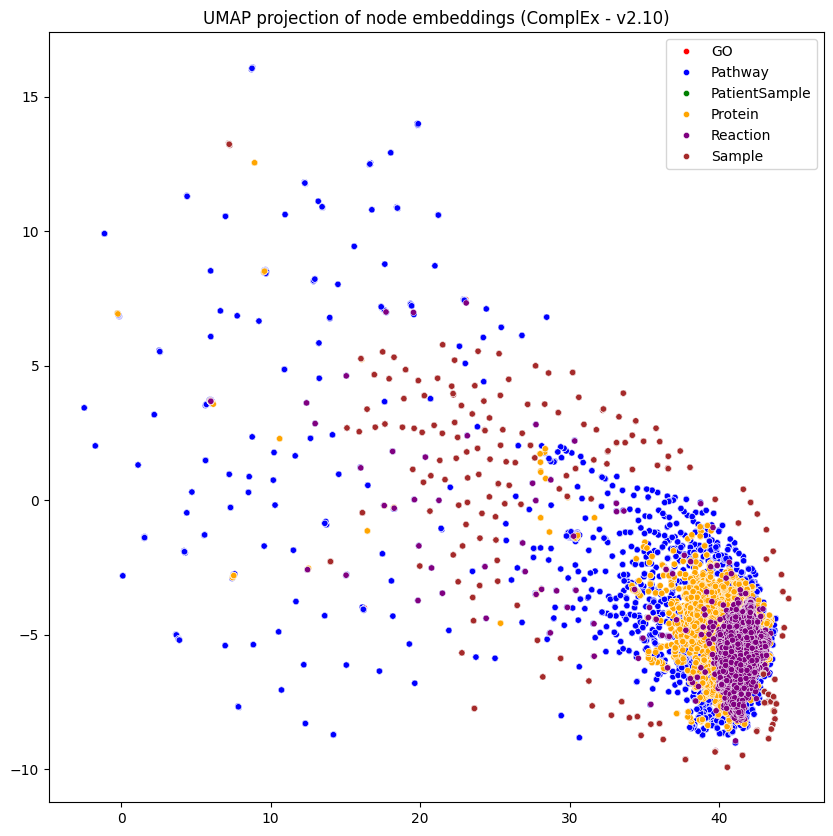

In [62]:

plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_umap[:,0], y=embedding_umap[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'UMAP projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()

### pca

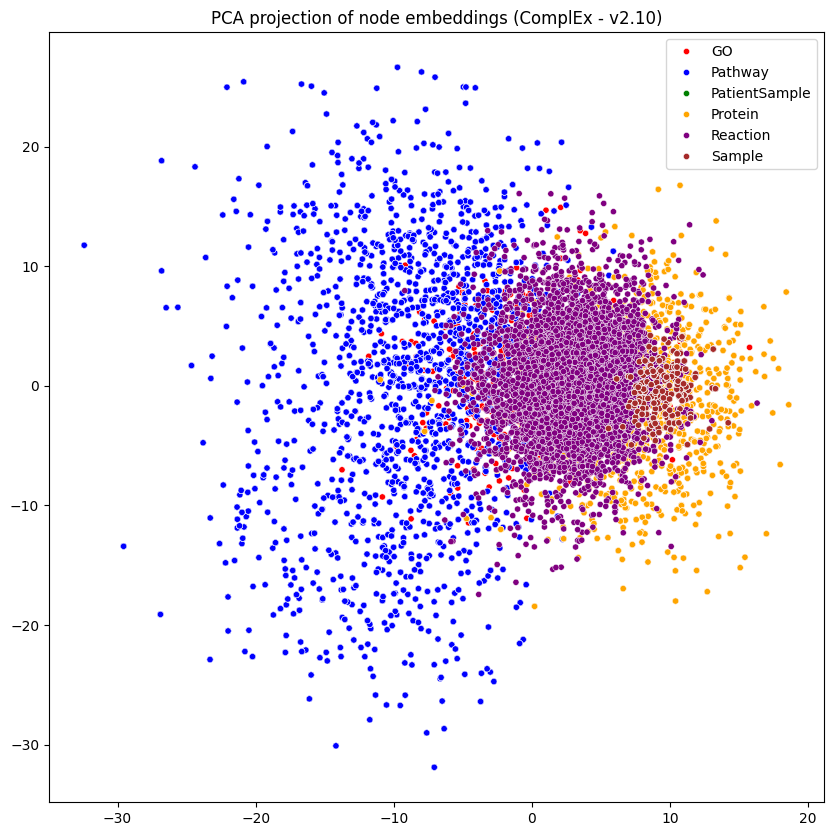

In [63]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'PCA projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()  

### tsne

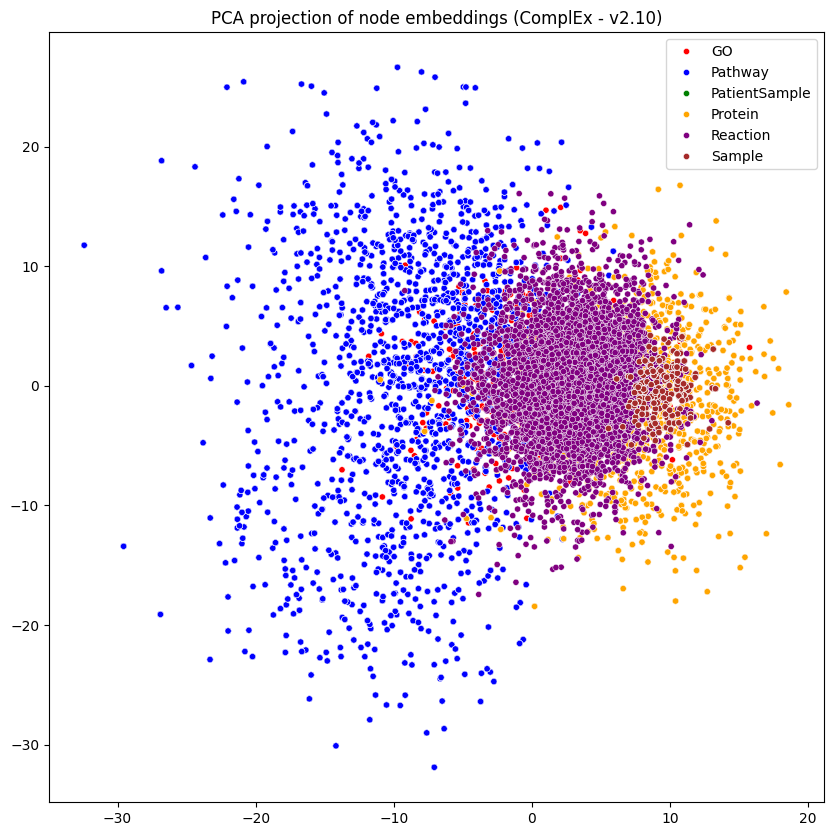

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding_pca[:,0], y=embedding_pca[:,1], hue=df['class'], palette=colors, s=20)
plt.title(f'PCA projection of node embeddings ({model} - {version})')
plt.legend()
plt.show()

## 2. proteins node embeddings

In [67]:
model='ComplEx'
version='v2.10'

In [66]:
df=_load_filtered_entities(model,version,'Protein')
df.iloc[:,5:df.shape[1]-1]

 Complex embeddings detected in /mnt/c/Users/rayan/Documents/saclay/courses/deep-learning-and-artifical-intelligence/project/2526-m2geniomhe-GNN-sepsis/notebooks/viz/../../models/executions/GSE54514_enriched_ontology_degfilterv2.10/outputmodel_ComplEx_entity_embeddings.npy, splitting real+imag.


,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_189,emb_190,emb_191,emb_192,emb_193,emb_194,emb_195,emb_196,emb_197,emb_198
7224,-0.617301,5.868161,-1.085886,-0.139031,-6.370385,0.504347,-3.819961,2.322333,0.442709,2.914857,...,-2.183412,1.592991,1.811439,5.116461,0.056212,4.858486,2.305987,-0.796394,0.920511,10.055500
7225,-2.509974,4.398898,-3.782592,9.479776,-9.734801,3.441568,-3.153900,-15.230906,8.334370,-3.419079,...,-1.956802,-2.640464,9.485981,8.005071,14.672046,0.085490,9.304512,2.591553,-2.864973,-3.900090
7226,-2.509974,4.398898,-3.782592,9.479776,-9.734801,3.441568,-3.153900,-15.230906,8.334370,-3.419079,...,-1.956802,-2.640464,9.485981,8.005071,14.672046,0.085490,9.304512,2.591553,-2.864973,-3.900090
7227,-2.509974,4.398898,-3.782592,9.479776,-9.734801,3.441568,-3.153900,-15.230906,8.334370,-3.419079,...,-1.956802,-2.640464,9.485981,8.005071,14.672046,0.085490,9.304512,2.591553,-2.864973,-3.900090
7228,0.406427,3.058400,5.495103,-1.553725,1.301869,2.276537,1.072287,-4.077550,-0.943426,-1.480135,...,-1.599365,10.988233,-0.385287,-5.137246,4.512245,0.766409,8.578665,8.192780,0.686986,1.597278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,-5.833541,0.227846,1.363709,7.365244,4.258060,2.519170,-1.628099,-2.403975,-6.591419,-1.335142,...,-1.705503,2.771830,1.734143,-2.190489,-5.193799,1.848183,-2.476816,-3.415275,-1.428645,2.111783
11087,-5.833541,0.227846,1.363709,7.365244,4.258060,2.519170,-1.628099,-2.403975,-6.591419,-1.335142,...,-1.705503,2.771830,1.734143,-2.190489,-5.193799,1.848183,-2.476816,-3.415275,-1.428645,2.111783
11088,-4.006022,2.205475,-5.041567,-2.673204,-1.839708,-3.667799,-3.711062,-2.394285,3.830617,-5.776543,...,2.120190,2.666039,1.784294,5.085724,-4.143923,2.599180,-7.281944,-0.753431,0.040339,-9.816345
11089,-4.006022,2.205475,-5.041567,-2.673204,-1.839708,-3.667799,-3.711062,-2.394285,3.830617,-5.776543,...,2.120190,2.666039,1.784294,5.085724,-4.143923,2.599180,-7.281944,-0.753431,0.040339,-9.816345


In [68]:
# -- checking for structure, might want to colo through converging scale for interpretability (embedding loadings)


import umap
import matplotlib.pyplot as plt
import seaborn as sns
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(df.iloc[:,5:df.shape[1]-1].values)

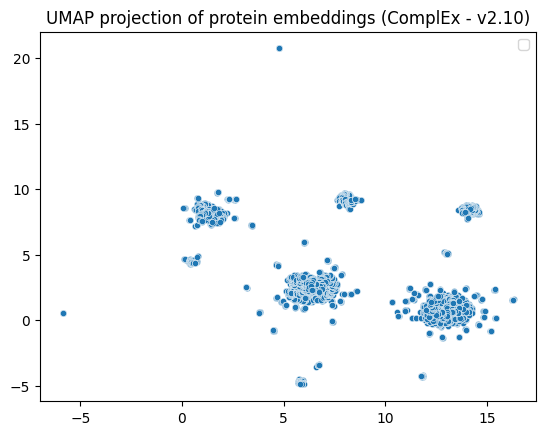

In [74]:
sns.scatterplot(x=embedding_umap[:,0], y=embedding_umap[:,1],  s=20)
plt.title(f'UMAP projection of protein embeddings ({model} - {version})')
plt.legend()
plt.show()